In [4]:
pip install tensorflow


In [5]:
pip install keras

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D, Flatten
import numpy as np
import pandas as pd

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
X_train = np.loadtxt('/content/drive/MyDrive/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/labels_test.csv', delimiter = ',')

In [20]:
X_train.shape

(2000, 30000)

In [22]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

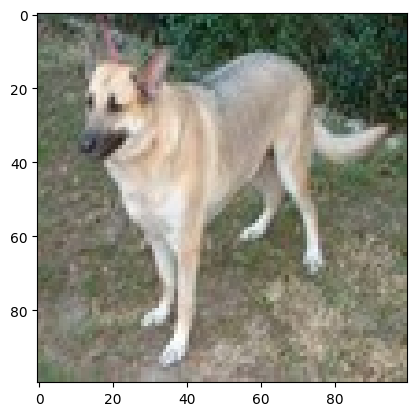

In [28]:
plt.imshow(X_train[2])

In [34]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')

])

In [35]:

model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [36]:
model.fit(X_train,Y_train,epochs=5,batch_size=100)

Epoch 1/5
20/20 [==============================] - 30s 1s/step - loss: 0.7085 - accuracy: 0.5115
Epoch 2/5
20/20 [==============================] - 22s 1s/step - loss: 0.6772 - accuracy: 0.6045
Epoch 3/5
20/20 [==============================] - 21s 1s/step - loss: 0.6390 - accuracy: 0.6565
Epoch 4/5
20/20 [==============================] - 22s 1s/step - loss: 0.5756 - accuracy: 0.7090
Epoch 5/5
20/20 [==============================] - 21s 1s/step - loss: 0.5037 - accuracy: 0.7605


In [37]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 3s 218ms/step - loss: 0.5784 - accuracy: 0.6950


[0.5784445405006409, 0.6949999928474426]

In [38]:
import random

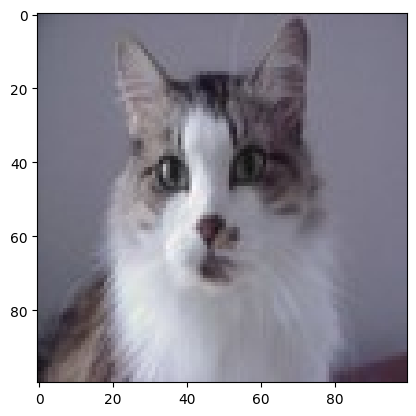

1/1 [==============================] - 0s 23ms/step
Our model says it is a : cat


In [61]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred
y_pred = y_pred > 0.5
if y_pred:
    pred = 'cat'
else:
    pred = 'dog'

print("Our model says it is a :", pred)